## **Cyclistic** - Google Data Analytics Certification Capstone Project
***Navin***

How Does a Bike-Share Navigate Speedy Success? 

**Background:**
This project is for the Google Data Analytics Certification capstone project.  

Cyclistic, a bike-share company in Chicago. Cyclistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.  

The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve the recommendations, so they must be backed up with compelling data insights and professional data visualizations.

This project will be completed by using the 6 Data Analytics stages:  

Ask: Identify the business task and determine the key stakeholders.  
Prepare: Collect the data, identify how it’s organized, determine the credibility of the data.  
Process: Select the tool for data cleaning, check for errors and document the cleaning process.  
Analyze: Organize and format the data, aggregate the data so that it’s useful, perform calculations and identify trends and relationships.  
Share: Use design thinking principles and data-driven storytelling approach, present the findings with effective visualization. Ensure the analysis has answered the business task.  
Act: Share the final conclusion and the recommendations.  

**Ask:**  

Business Task:  
Recommend marketing strategies aimed at converting casual riders into annual members by better understanding how annual members and casual riders use Cyclistic bikes differently.     

Stakeholders:  
Lily Moreno: The director of marketing and my manager.  
Cyclistic executive team: A detail-oriented executive team who will decide whether to approve the recommended marketing program.  
Cyclistic marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Cyclistic’s marketing strategy.  

**Prepare:**  

For this project, I will use the public data of Cyclistic’s historical trip data to analyze and identify trends. The data has been made available by [Motivate International Inc.](https://divvy-tripdata.s3.amazonaws.com/index.html)  under the [license.](https://www.divvybikes.com/data-license-agreement)

I downloaded the ZIP files containing the csv files from the above link but while uploading the files in kaggle (as I am using kaggle notebook), it gave me a warning that the dataset is already available in kaggle. So I will be using the dataset **cyclictic-bike-share** dataset from kaggle. The dataset has 13 csv files from April 2020 to April 2021. For the purpose of my analysis I will use the csv files from April 2020 to March 2021. The source csv files are in Kaggle so I can rely on it's integrity.   

I am using Microsoft Excel to get a glimpse of the data. There is one csv file for each month and has information about the bike ride which contain details of the ride id, rideable type, start and end time, start and end station, latitude and longitude of the start and end stations.

**Process:**  

I will use R as language in kaggle to import the dataset to check how it’s organized, whether all the columns have appropriate data type, find outliers and if any of these data have sampling bias.

I will be using below R libraries

In [1]:
#Load the tidyverse, lubridate, ggplot2, sqldf and psych libraries

library(tidyverse)
library(lubridate)
library(ggplot2)
library(plotrix)
library("geosphere")
library("gridExtra") 
library("ggmap") 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



In [2]:
#Set the working directory 

setwd("/kaggle/input/cyclistic-bike-share")

In [3]:
#Import the csv files

bike_202004 <- read.csv("202004-divvy-tripdata.csv")
bike_202005 <- read.csv("202005-divvy-tripdata.csv")
bike_202006 <- read.csv("202006-divvy-tripdata.csv")
bike_202007 <- read.csv("202007-divvy-tripdata.csv")
bike_202008 <- read.csv("202008-divvy-tripdata.csv")
bike_202009 <- read.csv("202009-divvy-tripdata.csv")
bike_202010 <- read.csv("202010-divvy-tripdata.csv")
bike_202011 <- read.csv("202011-divvy-tripdata.csv")
bike_202012 <- read.csv("202012-divvy-tripdata.csv")
bike_202101 <- read.csv("202101-divvy-tripdata.csv")
bike_202102 <- read.csv("202102-divvy-tripdata.csv")
bike_202103 <- read.csv("202103-divvy-tripdata.csv")

In [4]:
str(bike_202004)
str(bike_202005)
str(bike_202006)
str(bike_202007)
str(bike_202008)
str(bike_202009)
str(bike_202010)
str(bike_202011)
str(bike_202012)
str(bike_202101)
str(bike_202102)
str(bike_202103)

'data.frame':	84776 obs. of  13 variables:
 $ ride_id           : chr  "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-04-26 17:45:14" "2020-04-17 17:08:54" "2020-04-01 17:54:13" "2020-04-07 12:50:19" ...
 $ ended_at          : chr  "2020-04-26 18:12:03" "2020-04-17 17:17:03" "2020-04-01 18:08:36" "2020-04-07 13:02:31" ...
 $ start_station_name: chr  "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : int  86 503 142 216 125 173 35 434 627 377 ...
 $ end_station_name  : chr  "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : int  152 499 255 657 323 35 635 382 359 508 ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.6 ..

From the structure I see that all 12 csvs have common attributes. Once basic data type is cleaning is done at individual dataframe, I will then merge and do further cleaning.  


The 'started_at' and 'ended_at' attributes which represents the start and end ride time is currently set as character data type in all dataframes. I will change these 2 attributes to date data type.  

Also, the 'start_station_id' and 'end_station_id' in bike_202012, bike_202101, bike_202102 and bike_202103 dataframes is currently set as character data type. I will change these to integer data type so that these 2 attribues' data type is consistent across the 12 dataframes.  

In [5]:
#Change the 'start_station_id' attribute in r_202012, r_202101, r_202102 and r_202103 dataframes to integer data type

#Supress warnings

options(warn=-1)

bike_202012$start_station_id <- as.integer(bike_202012$start_station_id)
bike_202101$start_station_id <- as.integer(bike_202101$start_station_id)
bike_202102$start_station_id <- as.integer(bike_202102$start_station_id)
bike_202103$start_station_id <- as.integer(bike_202103$start_station_id)  



#Change the 'end_station_id' attribute in r_202012, r_202101, r_202102 and r_202103 dataframes to integer data type  

bike_202012$end_station_id <- as.integer(bike_202012$end_station_id)
bike_202101$end_station_id <- as.integer(bike_202101$end_station_id)
bike_202102$end_station_id <- as.integer(bike_202102$end_station_id)
bike_202103$end_station_id <- as.integer(bike_202103$end_station_id)


In [6]:
#Merge individual month's data frames into one big data frame

all_trips <- bind_rows(bike_202004, bike_202005, bike_202006, bike_202007, bike_202008, bike_202009, bike_202010, bike_202011, bike_202012, bike_202101, bike_202102, bike_202103)

In [7]:
#Check the structure and get a glimpse of the consolidated data frame

str(all_trips)

glimpse(all_trips)

nrow(all_trips)

'data.frame':	3489748 obs. of  13 variables:
 $ ride_id           : chr  "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-04-26 17:45:14" "2020-04-17 17:08:54" "2020-04-01 17:54:13" "2020-04-07 12:50:19" ...
 $ ended_at          : chr  "2020-04-26 18:12:03" "2020-04-17 17:17:03" "2020-04-01 18:08:36" "2020-04-07 13:02:31" ...
 $ start_station_name: chr  "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : int  86 503 142 216 125 173 35 434 627 377 ...
 $ end_station_name  : chr  "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : int  152 499 255 657 323 35 635 382 359 508 ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.6 

[1] 3489748

In [8]:
# Add columns that list the date, month, day, and year of each ride
# This will allow to aggregate ride data for each month, day, or year 


all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%B")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- weekdays(all_trips$date)

In [9]:
#Check member_casual and rideable_type column to if there are any discrepancies on the rider and bike type

unique(all_trips$member_casual)

unique(all_trips$rideable_type)


[1] "member" "casual"

[1] "docked_bike"   "electric_bike" "classic_bike"

In [10]:
#Remove observations with NA

all_trips <- drop_na(all_trips)


In [11]:
#Check for test stations

unique(all_trips$start_station_name[grep("TEST", all_trips$start_station_name)])


[1] "HUBBARD ST BIKE CHECKING (LBS-WH-TEST)"
[2] "WATSON TESTING - DIVVY"

In [12]:
#Check for test stations
unique(all_trips$start_station_name[grep("test", all_trips$start_station_name)])

character(0)

In [13]:
#Remove the test stations and any stations with blank

all_trips <- (filter(all_trips, !(start_station_name == "WATSON TESTING - DIVVY" | start_station_name == "HUBBARD ST BIKE CHECKING (LBS-WH-TEST)" | start_station_name =="hubbard_test_lws" | start_station_name =="")))

In [14]:
#Create a data frame of stations with start station name and latitude and longitude. I will use this data frame while analyzing the popular top 10 stations

all_trips_stations <- all_trips[,c(5,9,10)]

In [15]:
#Remove duplicates based on the station name

all_trips_stations <- all_trips_stations[!duplicated(all_trips_stations$start_station_name),]

In [16]:
#Find total stations

NROW(unique(all_trips_stations))

[1] 696

In [17]:
#Calculate the ride length and convert it to Minutes

all_trips$ride_length <- difftime(all_trips$ended_at, all_trips$started_at)

all_trips$ride_length <- all_trips$ride_length/60

all_trips$ride_length <- round(all_trips$ride_length, 2)

In [18]:
# Inspect the structure of the columns

str(all_trips)

'data.frame':	2941502 obs. of  19 variables:
 $ ride_id           : chr  "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-04-26 17:45:14" "2020-04-17 17:08:54" "2020-04-01 17:54:13" "2020-04-07 12:50:19" ...
 $ ended_at          : chr  "2020-04-26 18:12:03" "2020-04-17 17:17:03" "2020-04-01 18:08:36" "2020-04-07 13:02:31" ...
 $ start_station_name: chr  "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : int  86 503 142 216 125 173 35 434 627 377 ...
 $ end_station_name  : chr  "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : int  152 499 255 657 323 35 635 382 359 508 ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.6 

In [19]:
# Converting "ride_length" to numeric so that I can run calculations on the data

all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))

In [20]:
#Remove observations where the ride length is less than 0

all_trips <- filter(all_trips, ride_length > 0)

In [21]:
# Find the overall ride_lenth min, max, mean and median by rider type

summary(all_trips$ride_length)

# Compare members and casual users
all_trips %>% 
  group_by(member_casual) %>% 
  summarise(avg_ride_lenth = mean(ride_length), median_ride_length = median(ride_length), max_ride_length = max(ride_length), min_ride_length = min(ride_length))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.02     8.45    15.42    29.28    27.82 58720.03 

member_casual,avg_ride_lenth,median_ride_length,max_ride_length,min_ride_length
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,46.52125,22.18,55683.88,0.02
member,16.40665,12.02,58720.03,0.02


In [22]:
# Order the days of the week. Will also order the month

all_trips$day_of_week <- ordered(all_trips$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

all_trips$month <- ordered(all_trips$month, levels=c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))

In [23]:
# Check the average ride time by each day for members vs casual users

aggregate(all_trips$ride_length ~ all_trips$member_casual + all_trips$day_of_week, FUN = mean)

all_trips$member_casual,all_trips$day_of_week,all_trips$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,52.15010
member,Sunday,18.63380
casual,Monday,46.94163
member,Monday,15.50413
casual,Tuesday,42.10003
member,Tuesday,15.43946
casual,Wednesday,42.21735
member,Wednesday,15.49720
casual,Thursday,44.85139


In [24]:
#All rides by day of the week and type of rider

all_trips_by_day <- all_trips %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>%
  arrange(member_casual, day_of_week)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



In [25]:
#View the data frame

head(all_trips_by_day,14)

member_casual,day_of_week,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sunday,232258,52.15010
casual,Monday,129858,46.94163
casual,Tuesday,124569,42.10003
casual,Wednesday,137174,42.21735
casual,Thursday,146905,44.85139
casual,Friday,185810,44.28151
casual,Saturday,296613,48.00692
member,Sunday,220331,18.63380
member,Monday,215008,15.50413


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



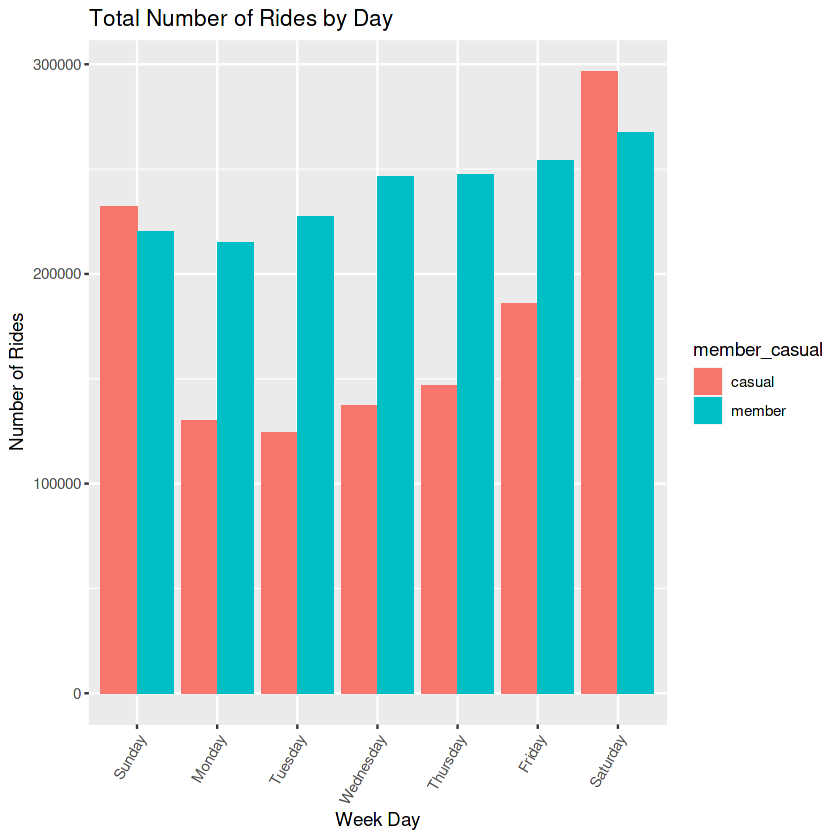

In [26]:
# Turn off scientific notation

options(scipen=999)
options(warn=-1)

setwd("/kaggle/working")

#Analyze ridership data by type and weekday

all_trips %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>%
  arrange(member_casual, day_of_week)%>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") + labs(title="Total Number of Rides by Day", x = "Week Day", y = "Number of Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1))

In [27]:
#Find the total casual rides on Saturday, Sunday compared to Monday through Friday

total_rides_casual_sat_sun <- NROW(filter(all_trips, member_casual == "casual" & (day_of_week == "Saturday" | day_of_week == "Sunday")))

total_rides_casual_sat_sun

total_rides_casual_mon_fri <- NROW(filter(all_trips, member_casual == "casual" & !(day_of_week == "Saturday" | day_of_week == "Sunday")))

total_rides_casual_mon_fri

[1] 528871

[1] 724316

In [28]:
#Percentage of casual riders on Saturday, Sunday compared to Monday through Friday

labs <- c("Mon-Friday", "Sat-Sun")
slices_casual_week <- c(total_rides_casual_mon_fri, total_rides_casual_sat_sun)
piepercent <- round(100 * slices_casual_week / sum(slices_casual_week), 1)
lbls <- paste(labs, piepercent)
lbls_casual_week <- paste(lbls, "%", sep="")

lbls_casual_week

[1] "Mon-Friday 57.8%" "Sat-Sun 42.2%"

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



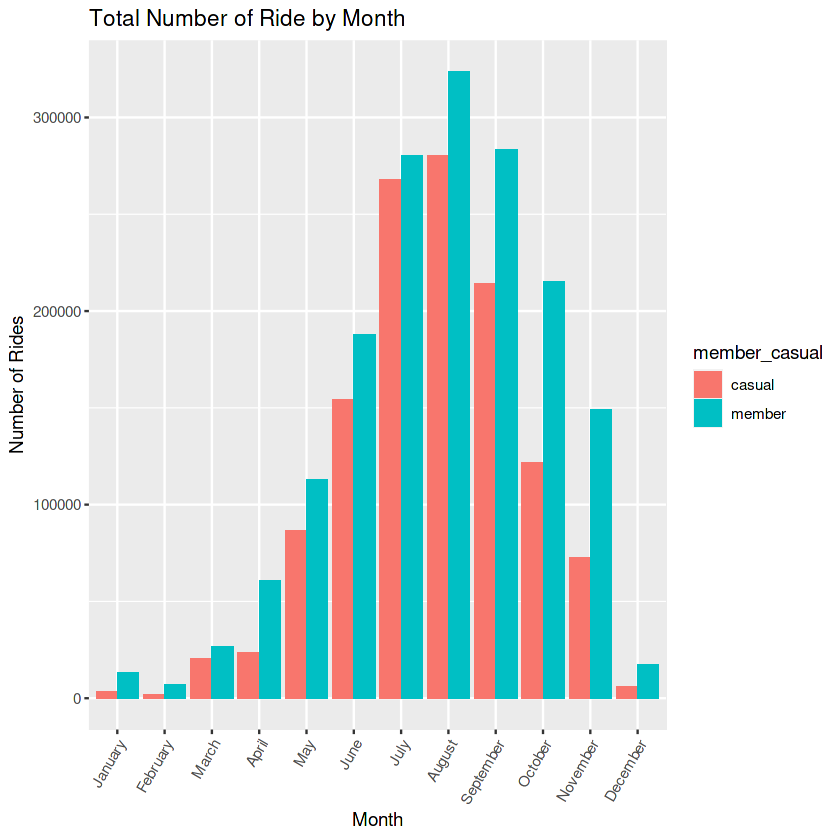

In [29]:
# Analyze ridership data by type and month

all_trips %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)	%>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") + labs(title="Total Number of Ride by Month", x = "Month", y = "Number of Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1))

In [30]:
#Find the total member rides by month - July to September compared to rest of the year

total_rides_member_jul_sept <- NROW(filter(all_trips, member_casual == "member" & (month == "July" | month == "August" | month == "September")))

total_rides_member_jul_sept

total_rides_member_except_Jul_sept <- NROW(filter(all_trips, member_casual == "member" & !(month == "July" | month == "August" | month == "September")))

total_rides_member_except_Jul_sept

[1] 887737

[1] 790173

In [31]:
#Percentage of member riders by month - July to September compared to rest of the year

labs <- c("Jul To Sept", "Rest of the Year")
slices_member_month <- c(total_rides_member_jul_sept, total_rides_member_except_Jul_sept)
piepercent <- round(100 * slices_member_month / sum(slices_member_month), 1)
lbls <- paste(labs, piepercent)
lbls_member_month <- paste(lbls, "%", sep="")


lbls_member_month

[1] "Jul To Sept 52.9%"      "Rest of the Year 47.1%"

In [32]:
#Create a new data frame for member riders

all_trips_member <-  filter(all_trips, member_casual == "member")

`summarise()` has grouped output by 'rideable_type'. You can override using the `.groups` argument.



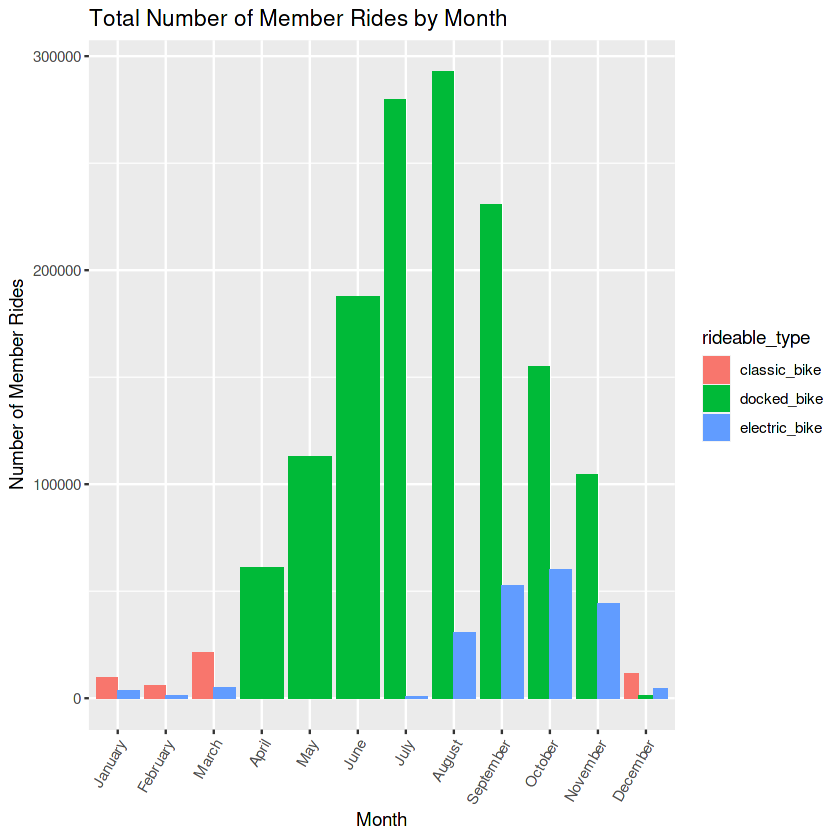

In [33]:
#Analyze member ridership data by type and month

all_trips_member %>% 
  group_by(rideable_type, month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 		
  arrange(rideable_type, month)	%>% 
  ggplot(aes(x = month, y = number_of_rides, fill = rideable_type)) +
  geom_col(position = "dodge") + labs(title="Total Number of Member Rides by Month", x = "Month", y = "Number of Member Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1))

`summarise()` has grouped output by 'rideable_type'. You can override using the `.groups` argument.



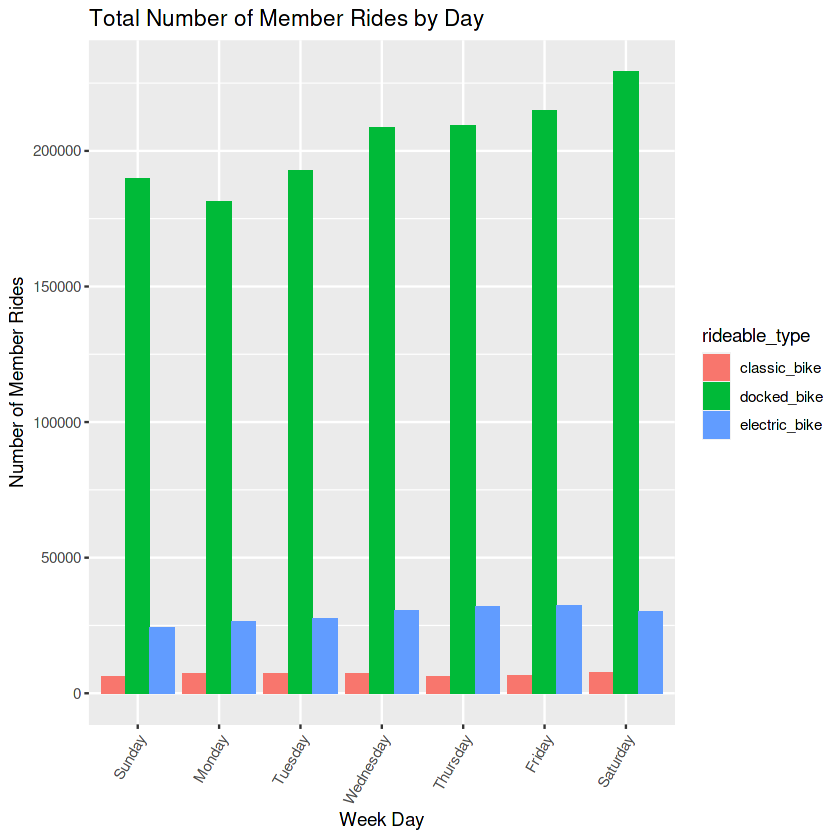

In [34]:
# Analyze member ridership data by type and month


all_trips_member %>% 
  group_by(rideable_type, day_of_week) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(rideable_type, day_of_week)%>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = rideable_type)) +
  geom_col(position = "dodge") + labs(title="Total Number of Member Rides by Day", x = "Week Day", y = "Number of Member Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1))

In [35]:
#Create a new data frame for casual riders

all_trips_casual <-  filter(all_trips, member_casual == "casual")

`summarise()` has grouped output by 'rideable_type'. You can override using the `.groups` argument.



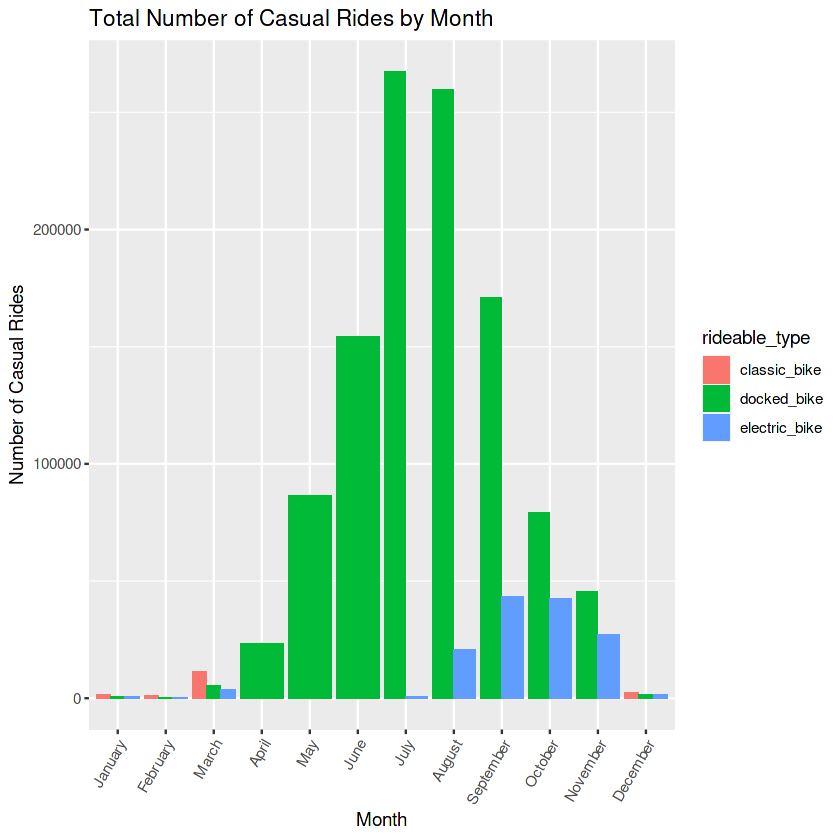

In [36]:
#Analyze casual ridership data by type and month

all_trips_casual %>% 
  group_by(rideable_type, month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 		
  arrange(rideable_type, month)	%>% 
  ggplot(aes(x = month, y = number_of_rides, fill = rideable_type)) +
  geom_col(position = "dodge") + labs(title="Total Number of Casual Rides by Month", x = "Month", y = "Number of Casual Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1))

Find the most popular route and stations of casual rides

In [37]:
#Create a new column with route on the casual riders data frame

all_trips_casual <- all_trips_casual %>%
  mutate(route = paste(start_station_name, "To", sep=" "))
         
         
all_trips_casual <- all_trips_casual %>%       
  mutate(route = paste(route, end_station_name, sep =" "))

In [38]:
#Find the most popular route by number of casual rides

popular_ride_route <- all_trips_casual %>% 
  group_by(route) %>%
  summarise(number_of_rides  = n(), average_duration_minutes = mean(ride_length)) %>% 
  arrange(route, number_of_rides, average_duration_minutes)

In [39]:
#Create a data frame of top 10 routes of casual riders 

popular_ride_route_top10 <- head(arrange(popular_ride_route, desc(number_of_rides)),10)

head(popular_ride_route_top10, 10)

route,number_of_rides,average_duration_minutes
<chr>,<int>,<dbl>
Streeter Dr & Grand Ave To Streeter Dr & Grand Ave,6077,58.47887
Lake Shore Dr & Monroe St To Lake Shore Dr & Monroe St,5925,53.80954
Millennium Park To Millennium Park,4989,57.62292
Buckingham Fountain To Buckingham Fountain,4839,78.25001
Indiana Ave & Roosevelt Rd To Indiana Ave & Roosevelt Rd,3635,64.37820
Michigan Ave & Oak St To Michigan Ave & Oak St,3570,56.59007
Michigan Ave & 8th St To Michigan Ave & 8th St,3131,63.80353
Fort Dearborn Dr & 31st St To Fort Dearborn Dr & 31st St,3001,72.14552
Shore Dr & 55th St To Shore Dr & 55th St,2800,71.17184


In [40]:
#Vefiry one of the number of observations with same start and end station for one of the station

NROW(filter(all_trips_casual, start_station_name == "Millennium Park" & end_station_name == "Millennium Park"))

[1] 4989

**The start and end stations are same for the Top 10 route of casual riders.**    

In [41]:
# Separate the top 10 start and end station names

popular_ride_route_top10 <- popular_ride_route_top10 %>%
  separate(route, c("start_station_name", "end_station_name"), sep = " To ")

In [42]:
# Create a new data frame with top 10 stations, number of rides and average ride duration

popular_ride_route_top10_start <- popular_ride_route_top10[,c(1,3,4)]

In [43]:
#Create a new data frame by joining all_trips_stations and popular_ride_route_top10_start to find the latitude and longitude of top 10 stations

m_top10_stations_casual <- merge(popular_ride_route_top10_start, all_trips_stations)

In [44]:
#View the top 10 stations' latitude and longitude

head(arrange(m_top10_stations_casual, desc(number_of_rides)), 10)

,start_station_name,number_of_rides,average_duration_minutes,start_lat,start_lng
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Streeter Dr & Grand Ave,6077,58.47887,41.8923,-87.6120
2,Lake Shore Dr & Monroe St,5925,53.80954,41.8810,-87.6167
3,Millennium Park,4989,57.62292,41.8810,-87.6241
4,Buckingham Fountain,4839,78.25001,41.8765,-87.6205
5,Indiana Ave & Roosevelt Rd,3635,64.37820,41.8679,-87.6230
6,Michigan Ave & Oak St,3570,56.59007,41.9010,-87.6238
7,Michigan Ave & 8th St,3131,63.80353,41.8728,-87.6240
8,Fort Dearborn Dr & 31st St,3001,72.14552,41.8386,-87.6082
9,Shore Dr & 55th St,2800,71.17184,41.7952,-87.5807


In [45]:
str(all_trips)

'data.frame':	2931097 obs. of  19 variables:
 $ ride_id           : chr  "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-04-26 17:45:14" "2020-04-17 17:08:54" "2020-04-01 17:54:13" "2020-04-07 12:50:19" ...
 $ ended_at          : chr  "2020-04-26 18:12:03" "2020-04-17 17:17:03" "2020-04-01 18:08:36" "2020-04-07 13:02:31" ...
 $ start_station_name: chr  "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : int  86 503 142 216 125 173 35 434 627 377 ...
 $ end_station_name  : chr  "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : int  152 499 255 657 323 35 635 382 359 508 ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.6 

In [46]:
#Lets check now the coordinates data of the rides, to see if is there any interesting pattern:

#First we create a table only for the most popular routes (>250 times)
coordinates_table <- all_trips %>% 
filter(start_lng != end_lng & start_lat != end_lat) %>%
group_by(start_lng, start_lat, end_lng, end_lat, member_casual, rideable_type) %>%
summarise(total = n(),.groups="drop") %>%
filter(total > 250)

#Then we create two sub tables for each user type
casual <- coordinates_table %>% filter(member_casual == "casual")
member <- coordinates_table %>% filter(member_casual == "member")

#Lets store bounding box coordinates for ggmap:
chi_bb <- c(
  left = -87.700424,
  bottom = 41.790769,
  right = -87.554855,
  top = 41.990119
)

#Here we store the stamen map of Chicago
chicago_stamen <- get_stamenmap(
  bbox = chi_bb,
  zoom = 12,
  maptype = "toner"
)

Source : http://tile.stamen.com/toner/12/1050/1520.png

Source : http://tile.stamen.com/toner/12/1051/1520.png

Source : http://tile.stamen.com/toner/12/1050/1521.png

Source : http://tile.stamen.com/toner/12/1051/1521.png

Source : http://tile.stamen.com/toner/12/1050/1522.png

Source : http://tile.stamen.com/toner/12/1051/1522.png

Source : http://tile.stamen.com/toner/12/1050/1523.png

Source : http://tile.stamen.com/toner/12/1051/1523.png



Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



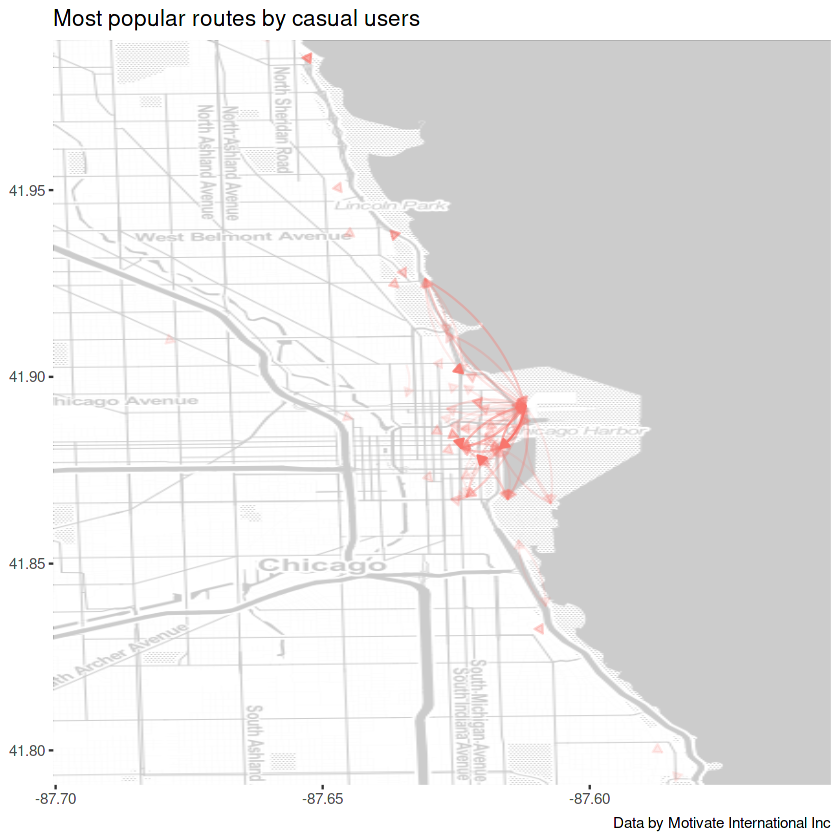

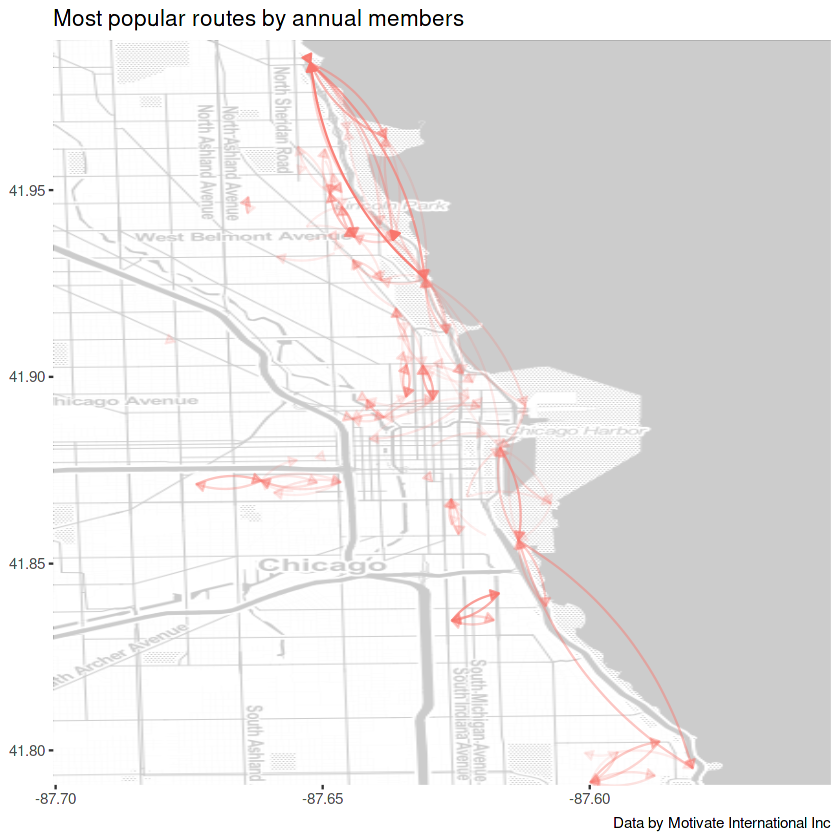

In [47]:
#Then we plot the data on the map
options(warn=-1)
ggmap(chicago_stamen,darken = c(0.8, "white")) +
   geom_curve(casual, mapping = aes(x = start_lng, y = start_lat, xend = end_lng, yend = end_lat, alpha= total, color=rideable_type), size = 0.5, curvature = .2,arrow = arrow(length=unit(0.2,"cm"), ends="first", type = "closed")) +
    coord_cartesian() +
    labs(title = "Most popular routes by casual users",x=NULL,y=NULL, color="User type", caption = "Data by Motivate International Inc") +
    theme(legend.position="none")

ggmap(chicago_stamen,darken = c(0.8, "white")) +
    geom_curve(member, mapping = aes(x = start_lng, y = start_lat, xend = end_lng, yend = end_lat, alpha= total, color=rideable_type), size = 0.5, curvature = .2,arrow = arrow(length=unit(0.2,"cm"), ends="first", type = "closed")) +  
    coord_cartesian() +
    labs(title = "Most popular routes by annual members",x=NULL,y=NULL, caption = "Data by Motivate International Inc") +
    theme(legend.position="none")


In [48]:
#Create new data frame containing only member riders

all_trips_member <- filter(all_trips, member_casual == "member")



#Create a new column with route

all_trips_member <- all_trips_member %>%
  mutate(route = paste(start_station_name, "To", sep=" "))
         
         
all_trips_member <- all_trips_member %>%       
  mutate(route = paste(route, end_station_name, sep =" "))

In [49]:
#Most popular route by number of rides

popular_ride_route_member <- all_trips_member %>% 
  group_by(route) %>%
  summarise(number_of_rides  = n(), average_duration_minutes = mean(ride_length)) %>% 
  arrange(route, number_of_rides, average_duration_minutes)


In [50]:
#Top 10 popular member ride routes

popular_ride_route_member_top10 <- head(arrange(popular_ride_route_member, desc(number_of_rides)),10)

head(popular_ride_route_member_top10, 10)

route,number_of_rides,average_duration_minutes
<chr>,<int>,<dbl>
Burnham Harbor To Burnham Harbor,1007,26.068729
Lake Shore Dr & Wellington Ave To Lake Shore Dr & Wellington Ave,1007,23.328749
Dearborn St & Erie St To Dearborn St & Erie St,964,21.695405
MLK Jr Dr & 29th St To State St & 33rd St,948,7.553861
Clark St & Elm St To Clark St & Elm St,932,17.755204
Broadway & Barry Ave To Broadway & Barry Ave,929,22.040710
Lake Shore Dr & Belmont Ave To Lake Shore Dr & Belmont Ave,905,26.973481
Theater on the Lake To Theater on the Lake,895,21.752615
Lake Shore Dr & North Blvd To Lake Shore Dr & North Blvd,885,21.821288


In [51]:
#Vefiry one of the number of observations with same start and end station for one of the station

NROW(filter(all_trips_member, start_station_name == "Lake Shore Dr & Belmont Ave" & end_station_name == "Lake Shore Dr & Belmont Ave"))

[1] 905

In [52]:
# Separate the top 10 start and end station names

popular_ride_route_member_top10 <- popular_ride_route_member_top10 %>%
  separate(route, c("start_station_name", "end_station_name"), sep = " To ")

In [53]:
# Create a new data frame with top 10 stations, number of rides and average ride duration

popular_ride_route_top10_member_start <- popular_ride_route_member_top10[,c(1,3,4)]
#Create a new data frame by joining all_trips_stations and popular_ride_route_top20_start to find the latitude and longitude of top 20 stations

m_top10_stations_member <- merge(popular_ride_route_top10_member_start, all_trips_stations)

head(m_top10_stations_member, 10)

,start_station_name,number_of_rides,average_duration_minutes,start_lat,start_lng
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Broadway & Barry Ave,929,22.040710,41.9377,-87.6441
2,Burnham Harbor,1007,26.068729,41.8563,-87.6133
3,Clark St & Elm St,932,17.755204,41.9030,-87.6313
4,Dearborn St & Erie St,964,21.695405,41.8940,-87.6293
5,Lake Shore Dr & Belmont Ave,905,26.973481,41.9408,-87.6392
6,Lake Shore Dr & North Blvd,885,21.821288,41.9117,-87.6268
7,Lake Shore Dr & Wellington Ave,1007,23.328749,41.9367,-87.6368
8,Lakefront Trail & Bryn Mawr Ave,881,27.170829,41.9840,-87.6523
9,MLK Jr Dr & 29th St,948,7.553861,41.8421,-87.6170


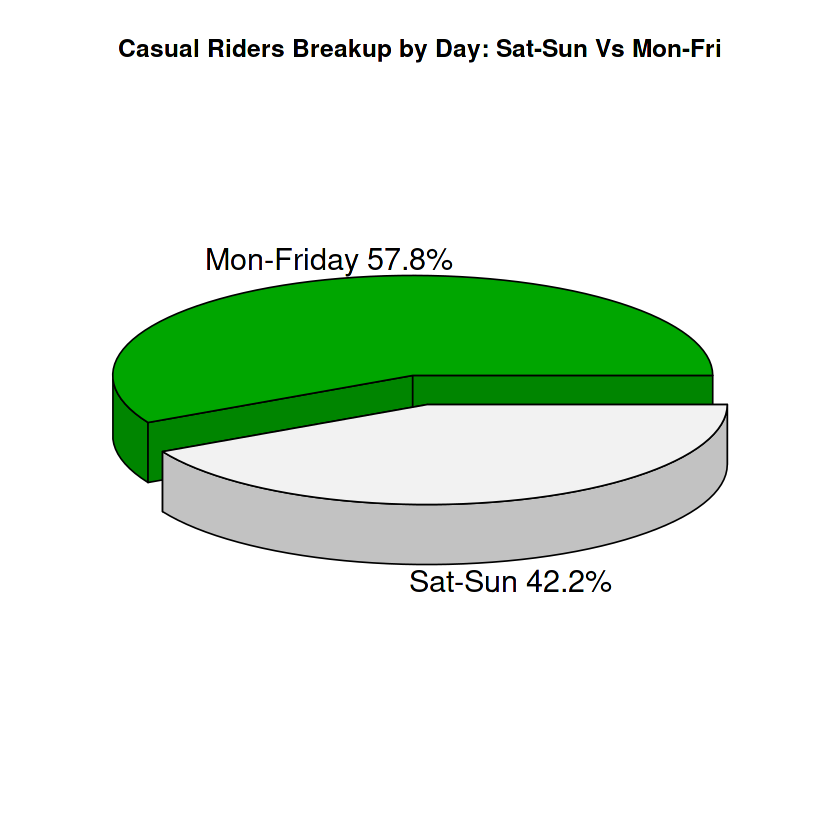

In [54]:
pie3D(slices_casual_week, labels = lbls_casual_week, explode = 0.1, col= terrain.colors(2), main = "Casual Riders Breakup by Day: Sat-Sun Vs Mon-Fri")

For both member and casual rider's ride '*docked bike*' is the most preferred bike almost throughout the year except from Decemember to March where '*classic bike*' was most popular.

**Act:**  
The high level recommendations for increasing the number of rider membership are:  

A little more than *60% of the casual riders* use Cyclictic over a span of 3 months from *July to September* which are the busy months with visitors in Chicago with a lot of events and festivals; **Marketing team must focus on top 10 stations during these months which are around the popular tourist's site** for:     
       **A weekly, monthly and quarterly membership schemes**       
      **Partner with Google and Microsoft search engines and popular visitor's sites of interest to increase the reach and offer special packages on the membership schemes**    
      **Increasing the number of bikes' availability over the period of these 3 months**  
        
    

Design campaign to ***promote the usage of bikes regularly by highliting the health and environmental beneficts by creating a mobile application*** which can show the calories burnt and carbon emmission reduction. And have a reward system once a certain level is reached. This will encourage memberships.  

**Collaborate with organizations and companies** in promoting the usage of bikes by offering various membership schemes; this will be a win-win situation for both.   

Increase the number of *classic bikes* availability from December to March as the total number of casual rides with classic bikes were high during these months. Design campaigns to promote the classic bike's usage by highliting it's benefits during these coldest months of Chicago.    

Further analysis needs to be carried out to find insights to reduce the average ride duration of casual riders as currently although ~43% of the total rides are done by casual riders but the average ride duration is ~3 times more than the member riders. And to increase the availability of bikes; need to shorten the ride duration.     
